In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
draft_df = pd.read_csv('draft.csv')

In [3]:
data = draft_df.pivot_table(index=['Year'], columns='Country', aggfunc='size', fill_value=0)

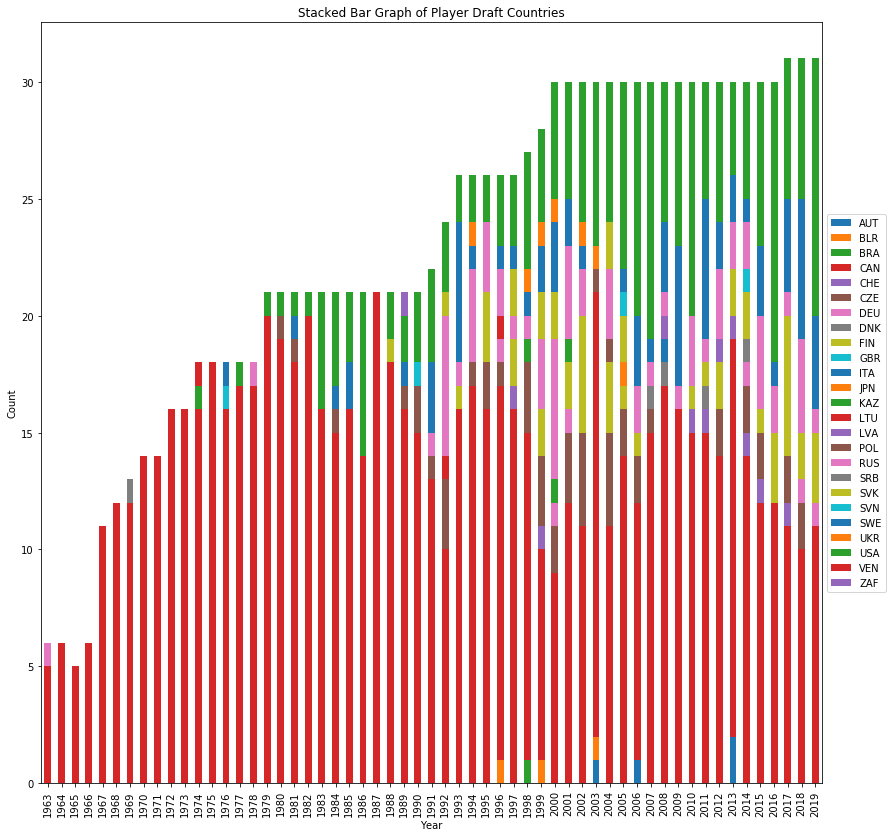

In [4]:
graph = data.plot.bar(stacked=True, figsize=(14,14))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.title("Stacked Bar Graph of Player Draft Countries")
plt.show()

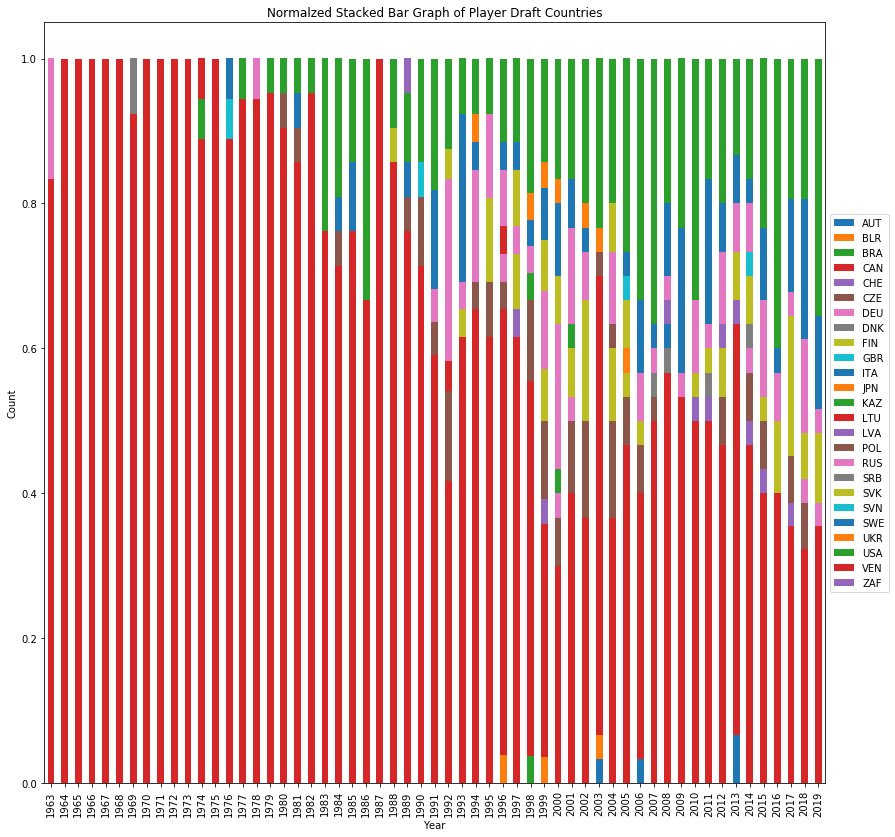

In [5]:
normal_data = data.div(data.sum(axis=1), axis=0)
normal_data.plot.bar(stacked=True, figsize=(14,14))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.title("Normalzed Stacked Bar Graph of Player Draft Countries")
plt.show()

# Evaluation of Significance

In [42]:
non_euro = data['BRA'] + data['CAN'] + data['JPN'] + data['KAZ'] + data['USA'] + data['VEN'] + data['ZAF']
euro = data['AUT'] + data['BLR'] + data['CHE'] + data['CZE'] + data['DEU'] + data['DNK'] + data['FIN'] + data['GBR'] + data['ITA'] + data['LTU'] + data['LVA'] + data['POL'] + data['RUS'] + data['SRB'] + data['SVK'] + data['SVN'] + data['SWE'] + data['UKR'] 

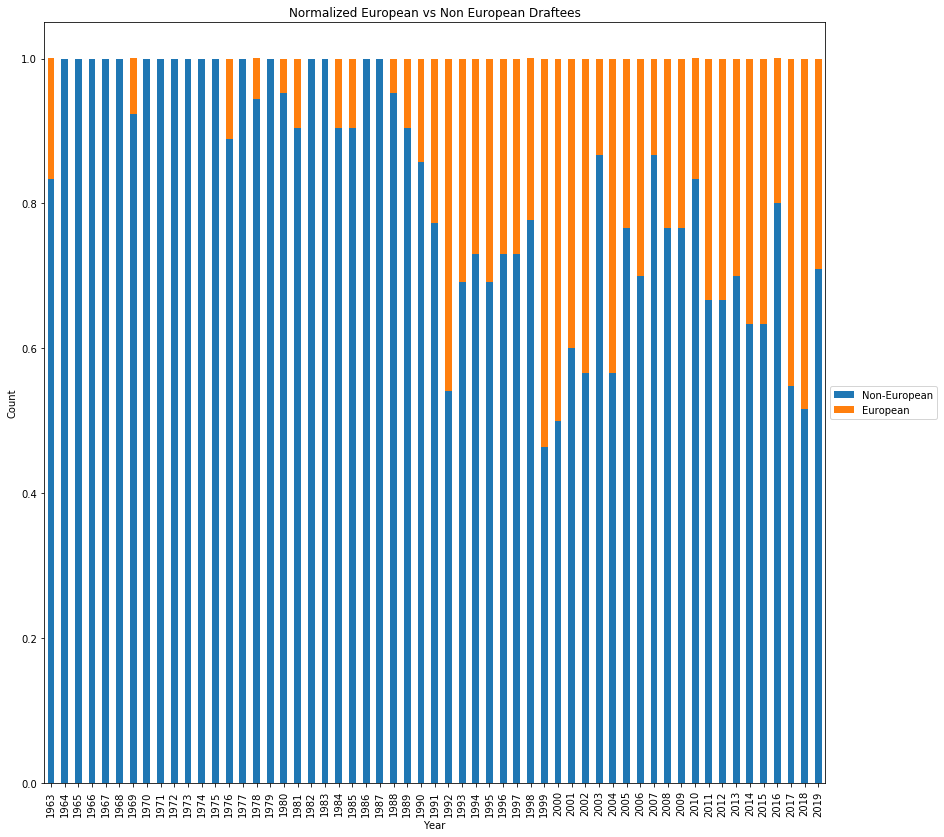

In [65]:
df = pd.DataFrame({'Non-European': non_euro, 'European': euro})
normal_df = df.div(data.sum(axis=1), axis=0)
normal_df.plot.bar(stacked=True, figsize=(14,14))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Count")
plt.title("Normalized European vs Non European Draftees")
plt.show()


In [67]:
years = np.array(draft_df['Year'].drop_duplicates())
years = years.reshape(-1, 1)
euro_model = LinearRegression().fit(years, euro)
euro_model_slope = float(euro_model.coef_)
print("Slope for model of European draftees:", euro_model_slope)
print("R squared Score for this model", euro_model.score(years, euro))
print("")
non_euro_model = LinearRegression().fit(years, non_euro)
non_euro_model_slope = float(non_euro_model.coef_)
print("Slope for model of Non European draftees:", non_euro_model_slope)
print("R squared Score for this model", non_euro_model.score(years, non_euro))
print("")
normal_euro_model = LinearRegression().fit(years, normal_df['European'])
normal_euro_slope = float(normal_euro_model.coef_)
print("Slope for model of Normalized European draftees:", normal_euro_slope)
print("R squared Score for this model", normal_euro_model.score(years, normal_df['European']))
print("")
normal_non_euro_model = LinearRegression().fit(years, normal_df['Non-European'])
normal_non_euro_slope = float(normal_non_euro_model.coef_)
print("Slope for model of Normalized Non-European draftees:", normal_non_euro_slope)
print("R squared Score for this model", normal_non_euro_model.score(years, normal_df['Non-European']))



Slope for model of European draftees: 0.24027741768213637
R squared Score for this model 0.653045612250692

Slope for model of Non European draftees: 0.18414570910033706
R squared Score for this model 0.4163409429043505

Slope for model of Normalized European draftees: 0.0075930428802145076
R squared Score for this model 0.5821621853299626

Slope for model of Normalized Non-European draftees: -0.0075930428802145076
R squared Score for this model 0.5821621853299626


For explaining this significance of data, using both original data and then the normalized set of data is neccessary. This is because over time there has been an increase in number of drafts per year as more teams are added to the NHL. Just looking at the original data slopes would show that the both Non-European and European datasets have an increase of around 0.5 players drafted per year with a marginally high R squared score. <br><br>

But then once the data is normalized we see the increase in European draftees increasing while Non-European decreasing. The value of the slopes for the normal data is so small because the data is out of 1.0 for each row. Moreover, there is an R^2 value of 0.58 which gives more confidence with the validiy of the claim that more Europeans are joining the league. <br><br>

An interesting note to add would be that looking at the graph of normalized draftee counts per country, there is a linearly negative slope for Canadians meaning less are drafted each year. With that comes an increase in Americans and Europeans. There is greater influence from other countries today than there was in the 1960s - 1980s where Canadians were the overwhelming majority of those drafted. 